<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/MLnotS_CasoMall__Customers_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 4286 bytes


---
# Caso Mall Customers - KMeans

Se cuenta con un dataset de clientes de un importante mall de la ciudad. Los datos son los siguientes:

- CustomerID: correlativo identificador del cliente
- Genre: sexo del cliente
- Age: edad del cliente
- Annual Income: sueldo anual en miles de dolares
- Spending Score: score de gasto calculado para el cliente, mientras mayor más gasta

Se busca realizar una caracterización de los clientes, para lo cual se le solicita que realice una **Clusterización Jerárquica** considerando solamente las variables **Annual Income** y **Spending Score**. Se pide lo siguiente:

- Realice una clusterización K-Means
- Aplique método del codo para determinar la cantidad de clusters
- Aplique método de la silueta
- Agregue la clusterización al dataset

---

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Carga de datos

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Formulación del Modelo

In [6]:
X = dataset.iloc[:,3:5]

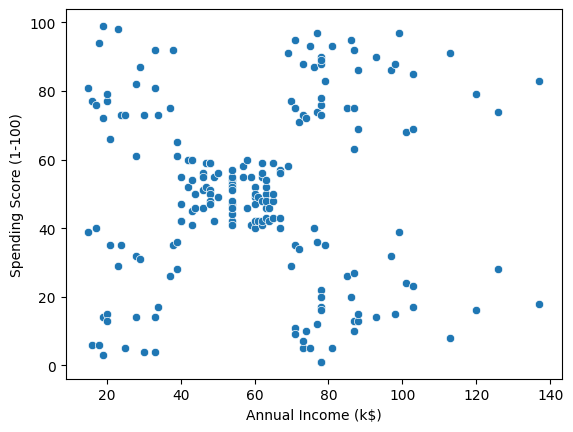

In [9]:
sns.scatterplot(data=X, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

### Escalamiento

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed)
X_transformed.columns = ['Annual Income (k$)', 'Spending Score (1-100)']

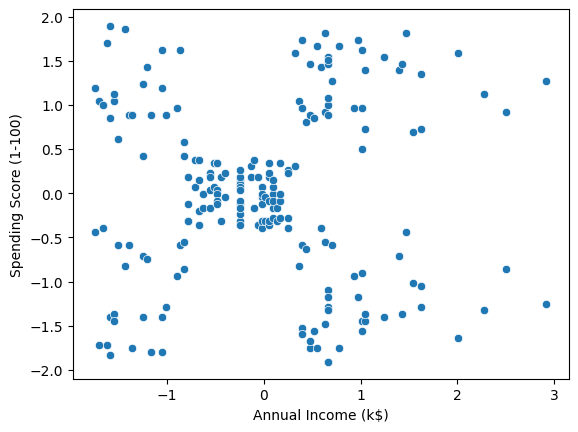

In [12]:
sns.scatterplot(data = X_transformed, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

### Clusterización KMeans

In [13]:
from sklearn.cluster import KMeans

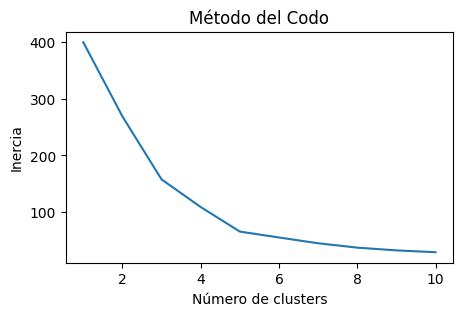

In [19]:
plt.figure(figsize=(5,3))

import warnings
warnings.filterwarnings("ignore")

# Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

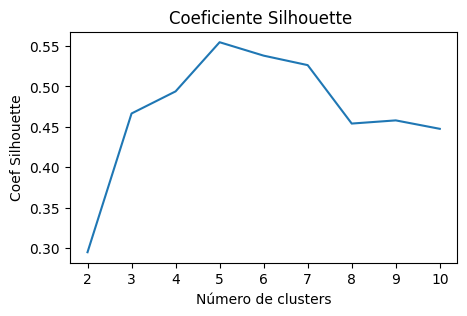

In [23]:
plt.figure(figsize=(5,3))

from sklearn.metrics import silhouette_samples, silhouette_score

savg = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
  kmeans.fit(X_transformed)
  silhouette_avg = silhouette_score(X_transformed, kmeans.labels_)
  savg.append(silhouette_avg)

plt.plot(range(2, 11),savg)
plt.title('Coeficiente Silhouette ')
plt.xlabel('Número de clusters')
plt.ylabel('Coef Silhouette')
plt.show()

#### **R.-** _Según los gráficos el valor óptimo de K es de **5**_.

In [26]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_transformed)
label = kmeans.labels_

In [29]:
label = pd.DataFrame(label)
label.columns = ['label']

In [31]:
condiciones = [
    (label['label'] == 0),
    (label['label'] == 1),
    (label['label'] == 2),
    (label['label'] == 3),
    (label['label'] == 4),
    ]

valores = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4','Cluster5']

label['label'] = np.select(condiciones, valores)

In [32]:
label.rename(columns = {'label':'Clusteres'}, inplace = True)

In [33]:
final = dataset.join(label)

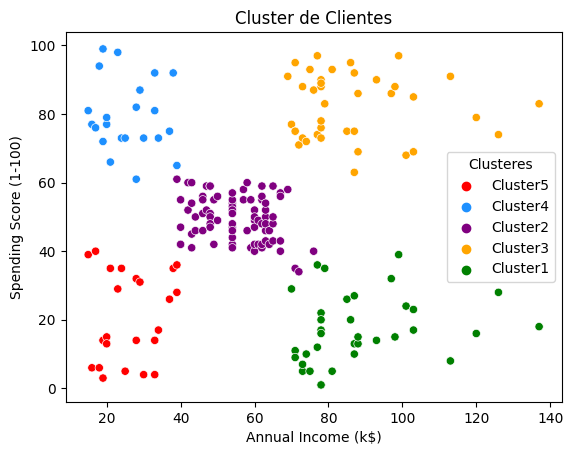

In [34]:
sns.scatterplot(data= final ,
                x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue ='Clusteres',
                palette=['red','dodgerblue','purple','orange','green'],
                legend='full')

plt.title('Cluster de Clientes')
plt.show()